# M2 IAI - Intelligence Artificielle 3 
# TP 1 : Autoencodeur sur Fashion-MNIST


Fashion-MNIST est un jeu de données d'images d'articles de Zalando (https://github.com/zalandoresearch/fashion-mnist), composé d'un ensemble d'apprentissage de 60 000 exemples et d'un ensemble de test de 10 000 exemples. Chaque exemple est une image en niveaux de gris de 28x28, associée à une étiquette parmi 10 classes. Zalando souhaite que Fashion-MNIST remplace directement le jeu de données MNIST original pour l'évaluation des algorithmes d'apprentissage automatique. Il partage la même taille d'image et la même structure de divisions de formation et de test.

![Fashion-mnist](https://pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_dataset_sample.png)



Le jeu de données MNIST original contient beaucoup de chiffres manuscrits. Les membres de la communauté de l'IA/ML/Science des données adorent ce jeu de données et l'utilisent comme référence pour valider leurs algorithmes. En fait, MNIST est souvent le premier jeu de données que les chercheurs essaient. "Si cela ne fonctionne pas sur MNIST, cela ne fonctionnera pas du tout", ont-ils dit. "Et si ça marche sur MNIST, ça peut encore échouer sur d'autres".

Zalando cherche à remplacer le jeu de données MNIST original.


## Description des données
1. Chaque image mesure 28 pixels de hauteur et 28 pixels de largeur, soit 784 pixels au total.
2. Chaque pixel est associé à une valeur unique, qui indique la clarté ou l'obscurité du pixel, les chiffres les plus élevés signifiant les plus sombres. Cette valeur de pixel est un nombre entier compris entre 0 et 255.
3. Les ensembles de données d'apprentissage et de test comportent 785 colonnes.
4.La première colonne est constituée des étiquettes de classe (voir ci-dessus) et représente l'article de vêtement.
5.Les autres colonnes contiennent les valeurs des pixels de l'image associée.


Pour localiser un pixel sur l'image, supposons que nous ayons décomposé x comme suit : x = i * 28 + j, où i et j sont des entiers compris entre 0 et 27. Le pixel est situé sur la ligne i et la colonne j d'une matrice 28 x 28. 


## Description des classes 

Chaque exemple d'apprentissage et de test est affecté à l'une des étiquettes suivantes :

0. T-shirt/top
1. Pantalon
2. Pull-over
3. Robe
4. Manteau
5. Sandale
6. Chemise
7. Sneakers
8. Sac
9. Botte 



In [1]:
# import des librairies 
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from  keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten, Activation, Dropout, Conv2DTranspose
from keras.models import Model, Sequential 

from sklearn.model_selection import train_test_split

## Chargement des données

In [2]:
from keras.datasets import fashion_mnist

# Nombre de classes
num_classes = 10
targets_names = ["T-shirt", "Pantalon", "Pull", "Robe", "Manteau", "Sandale", "Chemise", "Sneaker", "Sac", "Bottes"]

# Chargement base d'apprentissage et de test 
(images_train, y_train), (images_test, y_test) = fashion_mnist.load_data()

X_train,  X_val, y_train, y_val = train_test_split(images_train, y_train, test_size=0.1, shuffle=False)

# Reshape des data pour les formatter en 28x28x1
X_train = X_train.reshape(-1, 28,28,1)
X_val = X_val.reshape(-1, 28,28,1)
x_test=images_test.reshape(-1,28,28,1)

# normalisation 
X_train = X_train.astype("float32") / 255
X_val=X_val.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Affichage de la nouvelle shape des données (maintenant sous forme de matrice 28x28)
print(X_train.shape)
print(X_val.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(54000, 28, 28, 1)
(6000, 28, 28, 1)
(10000, 28, 28, 1)


In [3]:
# Passer les labels en categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
y_val=tf.keras.utils.to_categorical(y_val, num_classes)

In [4]:
# Dimensions des jeux de données
print(X_train.shape)
print(y_train.shape)

(54000, 28, 28, 1)
(54000, 10)


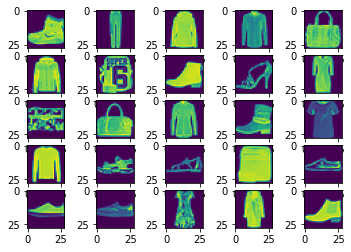

In [5]:
# Quelques exemples à afficher 
for i in range(25):
    plt.subplot(5,5,i+1);
    h = plt.imshow(images_train[1000*i]);

## Architecture CNN sous Tensorflow

Des premières fonctions tensorflow sont fournies pour réaliser les étapes de :
- *convolution* 
- *pooling*
- *flatten* 


Complétez l'architecture CNN à votre guise. 


In [ ]:
# Création de l'architecture 
model = Sequential()
#x0=Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = (28,28,1))(inputs)
#x1=MaxPooling2D(pool_size=2)(x0)
# à compléter
model.summary()

## Entraînement 

In [ ]:
# Optimisation du modèle : choix de la fonction loss et de l'optimiseur puis entraînement du modèle

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_val, y_val),
          batch_size=16)

# Analyse des résultats

In [ ]:
# Analyse des résultats 
def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
# Affichage des courbes d'apprentissage et de test 
plot_training_analysis()

# Autoencodeur 


A partir de cette architecture CNN et du TP autoencodeur version MLP fourni en cours, réaliser un autoencodeur sur la base de données fashion MNIST. 


In [ ]:
# Dimension de l'entrée
inputs_img = Input(shape=(28, 28, 1))


# Définition du encodeur



# Définition du décodeur




# Construction d'un modèle séparé pour pouvoir accéder aux décodeur et encodeur




# Construction d'un modèle séparé pour pouvoir accéder aux décodeur et encodeur


In [ ]:
# Autoencodeur
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

In [ ]:
# Entraînement de l'autoencodeur


In [ ]:
# Encode et decode sur quelques vêtements de la base de test :
#encoded_imgs = encoder.predict(...)
#decoded_imgs = decoder.predict(...)

In [8]:
def reconstruction_image(x_test,decoded_imgs):
  n = 20  # How many digits we will display
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
reconstruction_image(x_test,decoded_imgs)

# Application : Débruitage d'image

In [9]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


In [10]:
noisy_train_data = noise(X_train)
noisy_test_data = noise(x_test)


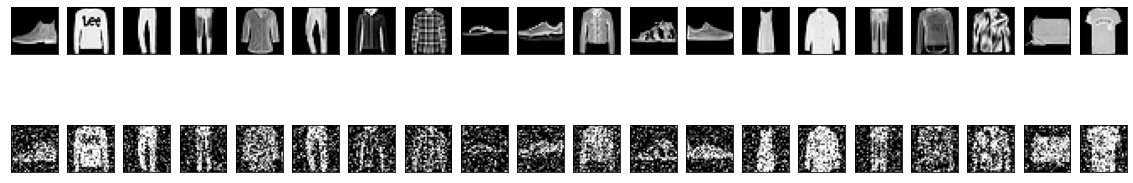

In [11]:
reconstruction_image(x_test,noisy_test_data)

In [ ]:
# Entraînement de l'autoencodeur

In [ ]:
# Prédiction sur ensemble test

In [ ]:
# Affichage des prédictions et reconstruction image